<a href="https://colab.research.google.com/github/fduartej/data_visualization_python/blob/main/notebook/CorrupcionPercepcionIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis de Datos de Corruption perceptions index (cpi) ranks countries/territories**

In [1]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive 
import libarchive 

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 15.3 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=26ee06834bca3b81202f711edb7346e4cc2fa64450850f00462cd0e2292dbf3b
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [2]:
!apt-get -qq install -y graphviz && pip install pydot 
import pydot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install cartopy 
import cartopy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 49.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 57.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.7 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37

In [4]:
!pip install chart_studio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.1 MB/s 


In [5]:
!pip install plotly==5.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 15.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [6]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 33.4 MB/s 
     |████████████████████████████████| 16.7 MB 64.4 MB/s 
     |████████████████████████████████| 6.3 MB 44.1 MB/s 


In [29]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 35.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=b30a6ec986212fa32ab3bb3ad723bec28fa8276df3f9f0eacd259f64edb1ec0d
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [42]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import plotly
plotly.__version__

'5.8.2'

In [45]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import pycountry 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE


%matplotlib inline

# Import seaborn
# https://github.com/datasets/corruption-perceptions-index/blob/master/data/cpi.csv
cpi = pd.read_csv('cpi.csv')
cpi = cpi.rename(columns={"Jurisdiction": "Country"})


#https://github.com/melanieshi0120/COVID-19_global_time_series_panel_data/blob/master/data/countries_latitude_longitude.csv
countrycode = pd.read_csv('countries_latitude_longitude.csv',delimiter=",")

In [46]:
cpi['alpha3']=alpha3code(cpi.Country)
cpi.head()

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,last,alpha3
0,Afghanistan,-,-,-,-,-,-,-,2.5,-,...,1.5,1.3,1.4,1.52,8,8,12,11,11,AFG
1,Albania,-,2.3,-,-,2.5,2.5,2.5,2.4,2.6,...,3.4,3.2,3.3,3.05,33,31,33,36,36,ALB
2,Algeria,-,-,-,-,-,2.6,2.7,2.8,3.1,...,3.2,2.8,2.9,2.9,34,36,36,36,36,DZA
3,Angola,-,-,1.7,-,1.7,1.8,2,2,2.2,...,1.9,1.9,1.9,2.01,22,23,19,15,15,AGO
4,Argentina,3,3,3.5,3.5,2.8,2.5,2.5,2.8,2.9,...,2.9,2.9,2.9,3,35,34,34,32,32,ARG


In [47]:
countrycode.head()

,Country,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672


In [48]:
cpi = pd.merge(cpi,countrycode, on='Country')
cpi.head()

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,last,alpha3,latitude,longitude
0,Afghanistan,-,-,-,-,-,-,-,2.5,-,...,1.4,1.52,8,8,12,11,11,AFG,33.939110,67.709953
1,Albania,-,2.3,-,-,2.5,2.5,2.5,2.4,2.6,...,3.3,3.05,33,31,33,36,36,ALB,41.153332,20.168331
2,Algeria,-,-,-,-,-,2.6,2.7,2.8,3.1,...,2.9,2.9,34,36,36,36,36,DZA,28.033886,1.659626
3,Angola,-,-,1.7,-,1.7,1.8,2,2,2.2,...,1.9,2.01,22,23,19,15,15,AGO,-11.202692,17.873887
4,Argentina,3,3,3.5,3.5,2.8,2.5,2.5,2.8,2.9,...,2.9,3,35,34,34,32,32,ARG,-38.416097,-63.616672


In [49]:
# Paises de la union europea
# Alemania, Bélgica, Croacia, Dinamarca, España, Francia, Irlanda, Letonia, Luxemburgo, Países Bajos, Suecia, Bulgaria, Eslovaquia,
# Estonia, Grecia, Malta, Polonia, República Checa, Austria, Chipre, Eslovenia, Finlandia, Hungría, Italia, Lituania, Portugal y Rumanía

cpiEuropa = cpi[(cpi.Country == 'Germany') | (cpi.Country =='Belgium') | (cpi.Country =='Croatia') |
     (cpi.Country =='Denmark') | (cpi.Country =='Spain') | (cpi.Country =='France') |
     (cpi.Country =='Irland') | (cpi.Country =='Latvia') | (cpi.Country =='Luxemburgo') |
     (cpi.Country =='Netherlands') | (cpi.Country =='Sweden') | (cpi.Country =='Bulgaria') | 
     (cpi.Country =='Slovakia') | (cpi.Country =='Estonia') | (cpi.Country =='Greece') | 
     (cpi.Country =='Malta') | (cpi.Country =='Poland') | (cpi.Country =='Czechia') | 
     (cpi.Country =='Austria') | (cpi.Country =='Cyprus') | (cpi.Country =='Slovenia') | 
     (cpi.Country =='Finland') | (cpi.Country =='Hungary') | (cpi.Country =='Italy') | 
     (cpi.Country =='Lithuania') | (cpi.Country =='Portugal') | (cpi.Country =='Romania') 
    ] 

#cpiEuropa = cpiEuropa.reset_index(drop=True).set_index('Jurisdiction')
cpiEuropa = cpiEuropa[['Country','alpha3','latitude','longitude','2011','2012','2013','2014','2015']]
cpiEuropa


,Country,alpha3,latitude,longitude,2011,2012,2013,2014,2015,last
7,Austria,AUT,47.516231,14.550072,7.79,69,69,72,76,76
12,Belgium,BEL,50.503887,4.469936,7.49,75,75,76,77,77
20,Bulgaria,BGR,42.733883,25.485830,3.33,41,41,43,41,41
31,Croatia,HRV,45.100000,15.200000,4.03,46,48,48,51,51
33,Cyprus,CYP,35.126413,33.429859,6.27,66,63,63,61,61
34,Denmark,DNK,56.263920,9.501785,9.39,90,91,92,91,91
41,Estonia,EST,58.595272,25.013607,6.35,64,68,69,70,70
44,Finland,FIN,61.892635,-6.911806,9.4,90,89,89,90,90
48,Germany,DEU,51.165691,10.451526,8.05,79,78,79,81,81
50,Greece,GRC,39.074208,21.824312,3.39,36,40,43,46,46


In [50]:
# https://stackoverflow.com/questions/64949449/plotting-line-graph-for-3-variables-in-python

#cpiEuropa['2005'] = cpiEuropa['2005'].astype(float)
#cpiEuropa['2006'] = cpiEuropa['2006'].astype(float)
#cpiEuropa['2007'] = cpiEuropa['2007'].astype(float)
#cpiEuropa['2008'] = cpiEuropa['2008'].astype(float)
#cpiEuropa['2009'] = cpiEuropa['2009'].astype(float)
#cpiEuropa['2010'] = cpiEuropa['2010'].astype(float)
cpiEuropa['2011'] = cpiEuropa['2011'].astype(float)
cpiEuropa['2012'] = cpiEuropa['2012'].astype(float)
cpiEuropa['2013'] = cpiEuropa['2013'].astype(float)
cpiEuropa['2014'] = cpiEuropa['2014'].astype(float)
cpiEuropa['2015'] = cpiEuropa['2015'].astype(float)

#cpiEuropa.info()


GEOPANDAS MAPA

In [51]:
## TODO: Mapita
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'alpha3', 'gdp_md_est', 'geometry']

merge=pd.merge(world,cpiEuropa,on='alpha3')

merge


,pop_est,continent,name,alpha3,gdp_md_est,geometry,Country,latitude,longitude,2011,2012,2013,2014,2015,last
0,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,60.128161,18.643501,9.30,88.0,89.0,87.0,89.0,89.0
1,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",Poland,51.919438,19.145136,5.48,58.0,60.0,61.0,62.0,62.0
2,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,47.516231,14.550072,7.79,69.0,69.0,72.0,76.0,76.0
3,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Hungary,47.162494,19.503304,4.56,55.0,54.0,54.0,51.0,51.0
4,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",Romania,45.943161,24.966760,3.61,44.0,43.0,43.0,46.0,46.0
5,2823859,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718...",Lithuania,55.169438,23.881275,4.75,54.0,57.0,58.0,61.0,61.0
6,1944643,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426...",Latvia,56.879635,24.603189,4.19,49.0,53.0,55.0,55.0,55.0
7,1251581,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...",Estonia,58.595272,25.013607,6.35,64.0,68.0,69.0,70.0,70.0
8,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",Germany,51.165691,10.451526,8.05,79.0,78.0,79.0,81.0,81.0
9,7101510,Europe,Bulgaria,BGR,143100.0,"POLYGON ((22.65715 44.23492, 22.94483 43.82379...",Bulgaria,42.733883,25.485830,3.33,41.0,41.0,43.0,41.0,41.0


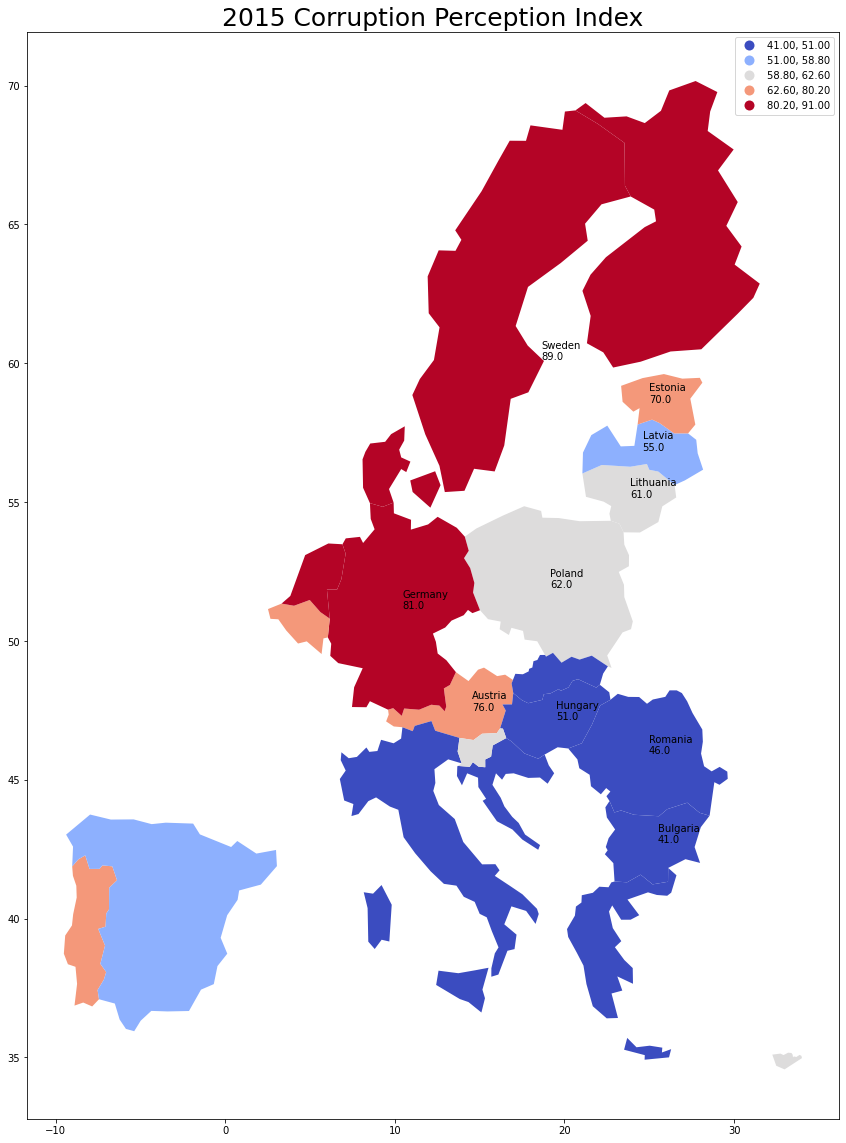

In [54]:
# plot cpi europa 2015
merge.plot(column='2015', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2015 Corruption Perception Index',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),
             float(merge.latitude[i]),
             "{}\n{}".format(merge.name[i],merge['2015'][i]),
             size=10)
plt.show()

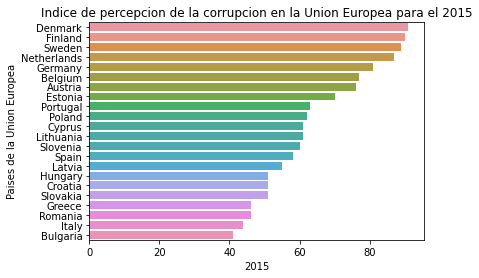

In [57]:
sns.barplot(
    x="2015", 
    y="Country", 
    data=cpiEuropa,
    order=cpiEuropa.sort_values('2015',ascending = False).Country)

## TODO: Agregar los colores 

plt.ylabel("Paises de la Union Europea")
plt.title("Indice de percepcion de la corrupcion en la Union Europea para el 2015")

plt.show()

#comparar solo 2 años donde hay un
#coger un mapa para un año especifico y comparar para los graficos de pendientes (facets)

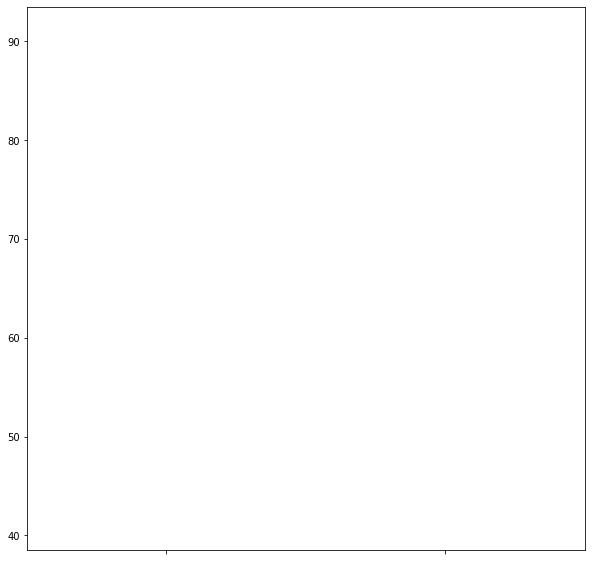

In [97]:
fig, ax = plt.subplots(1, figsize=(10,10))

for index, row in cpiEuropa.iterrows():
    #print(row['Country'], row['2014'], row['2015'])
    plt.plot('2014', row['2015'] )
    #plt.text(row['2014'], row['2015'], row['Country'])

#for i in cpiEuropa.rows:
#    print(i)
#    temp = cpiEuropa[cpiEuropa['Country'] == i]
#   
    
plt.xlim(2013.5,2015.5)
plt.xticks([2014, 2015])

plt.show()

In [78]:
cpiEuropa

,Country,2011,2012,2013,2014,2015
7,Austria,7.79,69.0,69.0,72.0,76.0
12,Belgium,7.49,75.0,75.0,76.0,77.0
20,Bulgaria,3.33,41.0,41.0,43.0,41.0
31,Croatia,4.03,46.0,48.0,48.0,51.0
33,Cyprus,6.27,66.0,63.0,63.0,61.0
34,Denmark,9.39,90.0,91.0,92.0,91.0
41,Estonia,6.35,64.0,68.0,69.0,70.0
44,Finland,9.40,90.0,89.0,89.0,90.0
48,Germany,8.05,79.0,78.0,79.0,81.0
50,Greece,3.39,36.0,40.0,43.0,46.0


In [59]:
# Crecimiento de la Corrupción en los últimos 5 años (animacion)
cpiEuropaWIndex = cpiEuropa.reset_index(drop=True).set_index('Country')
cpiEuropa

,Country,alpha3,latitude,longitude,2011,2012,2013,2014,2015,last
7,Austria,AUT,47.516231,14.550072,7.79,69.0,69.0,72.0,76.0,76.0
12,Belgium,BEL,50.503887,4.469936,7.49,75.0,75.0,76.0,77.0,77.0
20,Bulgaria,BGR,42.733883,25.485830,3.33,41.0,41.0,43.0,41.0,41.0
31,Croatia,HRV,45.100000,15.200000,4.03,46.0,48.0,48.0,51.0,51.0
33,Cyprus,CYP,35.126413,33.429859,6.27,66.0,63.0,63.0,61.0,61.0
34,Denmark,DNK,56.263920,9.501785,9.39,90.0,91.0,92.0,91.0,91.0
41,Estonia,EST,58.595272,25.013607,6.35,64.0,68.0,69.0,70.0,70.0
44,Finland,FIN,61.892635,-6.911806,9.40,90.0,89.0,89.0,90.0,90.0
48,Germany,DEU,51.165691,10.451526,8.05,79.0,78.0,79.0,81.0,81.0
50,Greece,GRC,39.074208,21.824312,3.39,36.0,40.0,43.0,46.0,46.0


In [65]:
#newCpi= cpiEuropa.drop(['alpha3', 'latitude','longitude','last'], axis=1, inplace=True)
newCpi = cpiEuropa.melt(id_vars=["Country"], 
        var_name="Annio", 
        value_name="Cpi")

newCpi = newCpi.sort_values(by=['Country', 'Annio'], ascending=True)


newCpi = newCpi[(newCpi.Country == 'Denmark') | (newCpi.Country =='Finland') | (newCpi.Country =='Sweden') |
     (newCpi.Country =='Netherlands') | (newCpi.Country =='Germany')
    ] 







In [69]:
fig = px.bar(newCpi, y='Country', x='Cpi', color_discrete_sequence=['red', 'yellow','green','blue'],
             text='Cpi', range_x=[0,100], color='Country', animation_frame="Annio", animation_group="Country",
             labels={"Country":"", "Annio":"Año", })

#para colocar los números fuera de las barras
fig.update_traces(texttemplate='%{text:.2s}')

fig.update_layout(showlegend=False, #ocultra leyendas
                  title='Top 5 de Crecimiento del Indice de Corrupcion en Europa desde el 2011',
                  xaxis=dict(showticklabels=False)) #ocultar ticks

fig.update_yaxes(categoryorder='total ascending')
fig

In [67]:
# Comparacion del Pais menos corrupto con el mas corrupto

#Grafico de Mapa el ultimo año de indice de corrupcion
#Grafico de Pendientes
#Grafico Animado: Crecimiento de la corrupcion top 5 en los paises de la union europea del 2011 - 2015 
